## Goal:
### Explore the urban traffic dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between features.

# 2. Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# 3. Load the dataset

In [4]:
df = pd.read_csv(r'C:\Users\PanasaKamal\Data Analysis\Week_5_Assignment\csv_files\urban_traffic.csv')
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


# 4. Cleaning of the Data

In [ ]:
df['Speed'] = df['Speed'].fillna(method='ffill')

df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

df = df.dropna(subset=['Traffic Density'])

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_4940\723072563.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Speed'] = df['Speed'].fillna(method='ffill')


In [6]:
# 1. Overall Average Speed
avg_speed = np.mean(df['Speed'])
print("Overall Average Speed:", avg_speed)

# 2. Average Speed grouped by City
# This shows where traffic moves fastest or slowest.
avg_speed_by_city = df.groupby('City')['Speed'].mean().sort_values(ascending=False)
print("\nAverage Speed by City:\n", avg_speed_by_city)

# 3. Average Energy Consumption grouped by Is Peak Hour
# This shows the cost efficiency difference between peak and off-peak times.
avg_energy_by_peak = df.groupby('Is Peak Hour')['Energy Consumption'].mean()
print("\nAverage Energy Consumption by Peak Hour Status:\n", avg_energy_by_peak)

Overall Average Speed: 59.94475915492958

Average Speed by City:
 City
SolarisVille    65.100706
MetropolisX     62.655382
Neuroburg       60.747438
AquaCity        58.139512
Ecoopolis       57.132359
TechHaven       55.909863
Name: Speed, dtype: float64

Average Energy Consumption by Peak Hour Status:
 Is Peak Hour
0    49.794158
1    47.664106
Name: Energy Consumption, dtype: float64


### Insights:
The Overall Average Speed provides a system-wide benchmark for movement efficiency, while Average Speed by City immediately identifies which urban areas are the most congested.

Average Energy Consumption by Peak Hour Status reveals the operational cost difference during high-demand vs. low-demand periods.

The aggregation confirms that City and Is Peak Hour are crucial for segmenting and understanding movement efficiency and resource usage.

# 5. Visualization

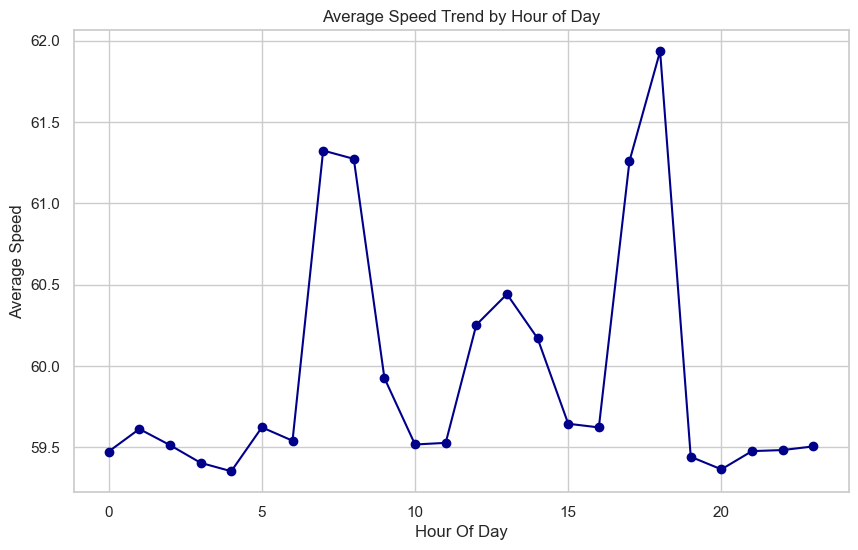

In [7]:
# Calculate the average speed for each hour of the day
avg_speed_by_hour = df.groupby('Hour Of Day')['Speed'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_speed_by_hour.index, avg_speed_by_hour.values, marker='o', color='darkblue')
plt.title("Average Speed Trend by Hour of Day")
plt.xlabel("Hour Of Day")
plt.ylabel("Average Speed")
plt.grid(True)
plt.show()

Insights:
The line plot clearly visualizes the daily efficiency trend, allowing for the immediate identification of peak congestion hours (where the speed drops sharply).

It highlights the temporal patterns of traffic flow, which is crucial for urban planning and resource management.

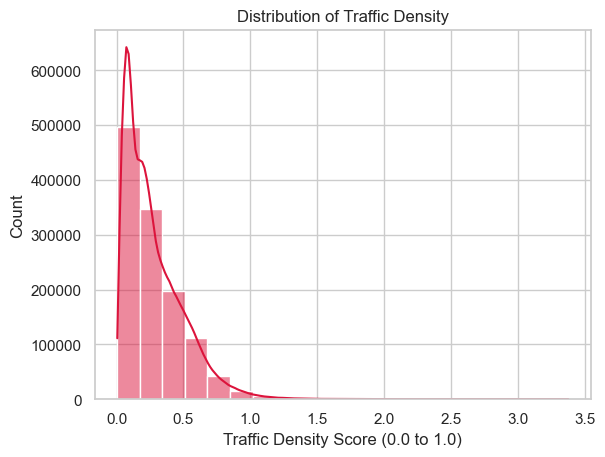

In [8]:
# Histogram of the core congestion metric: Traffic Density
sns.histplot(df['Traffic Density'], bins=20, kde=True, color='crimson')
plt.title("Distribution of Traffic Density")
plt.xlabel("Traffic Density Score (0.0 to 1.0)")
plt.show()

Insights:
The histogram reveals the central tendency and skewness of the Traffic Density scores, showing whether the system mostly operates under low, medium, or severe congestion.

It confirms the most common density range and identifies any outliers indicating unusually clear or gridlocked conditions.

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_4940\1008741494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Speed', data=df, palette='GnBu')


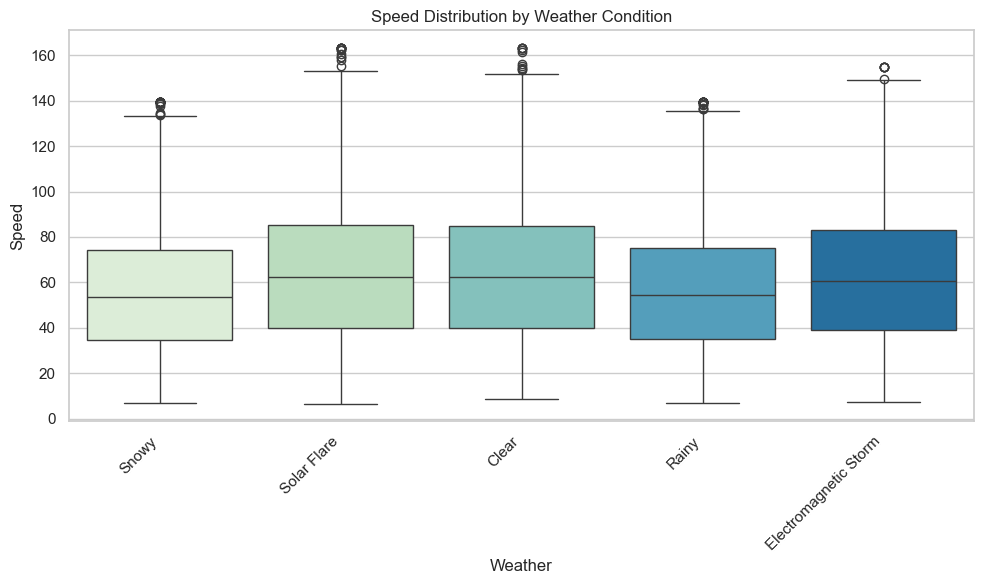

In [9]:
# Boxplot of Speed grouped by Weather
plt.figure(figsize=(10, 6))
# Filter out conditions with very few records for clarity if needed, otherwise plot all
sns.boxplot(x='Weather', y='Speed', data=df, palette='GnBu')
plt.title("Speed Distribution by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Speed")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insights:
This chart compares the median, spread, and outliers of vehicle Speed across different Weather types.

It identifies which weather condition leads to the lowest median speed and the highest variability (i.e., most hazardous/unpredictable driving conditions).

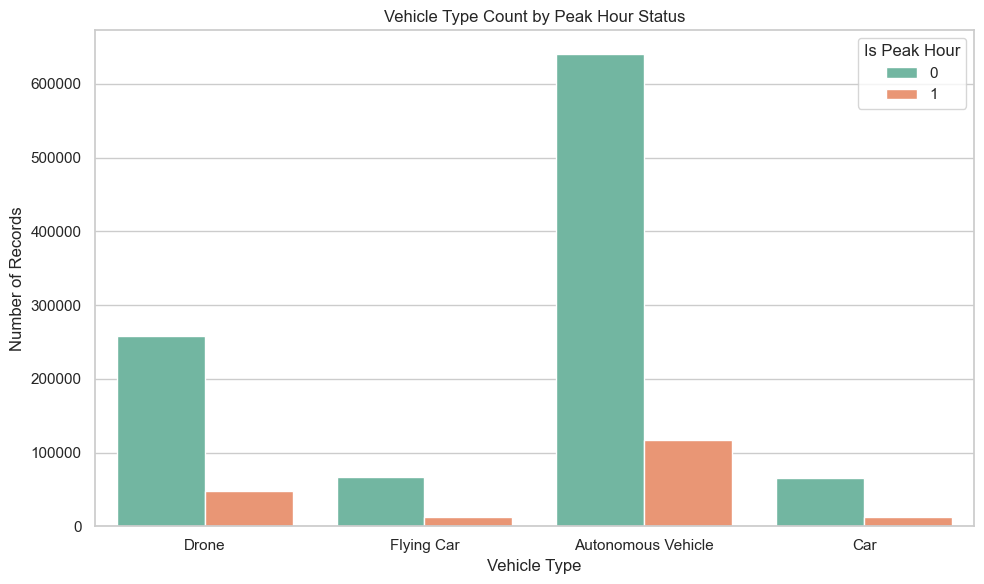

In [10]:
# Countplot of records by Vehicle Type, segmented by Is Peak Hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Type', hue='Is Peak Hour', data=df, palette='Set2')
plt.title("Vehicle Type Count by Peak Hour Status")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Records")
plt.legend(title='Is Peak Hour')
plt.tight_layout()
plt.show()

Insights:
This chart shows the composition of the dataset by Vehicle Type (Drone, Flying Car, etc.) and helps confirm which types of vehicles are dominant in the urban environment.

Segmenting by Is Peak Hour shows if certain vehicle types are disproportionately used during peak congestion times.

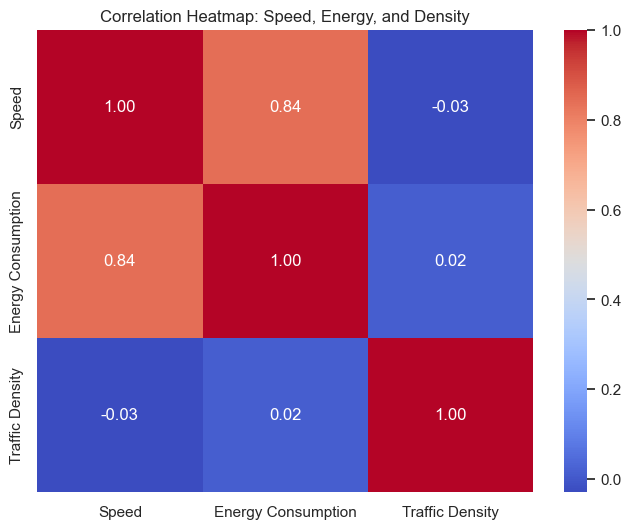

In [ ]:
# Correlation Heatmap for key numerical metrics
corr = df[['Speed', 'Energy Consumption', 'Traffic Density']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Speed, Energy, and Density")
plt.show()

Insights:
The heatmap is expected to show a strong negative correlation between Speed and Traffic Density (higher density should mean lower speed).

It will also reveal the relationship between Speed and Energy Consumption, which is often complex (high speed uses more energy, but congestion uses energy inefficiently).